<a href="https://colab.research.google.com/github/vasanthi2015/AI/blob/master/ensembleprj_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Ensemble Project

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plot
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")


In [ ]:
#Deliverable 1
#Read  data file
cust_data = pd.read_csv("bank-full.csv")
print(cust_data.dtypes)
cust_data.head()

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
#find if there any missing values but there are many 'unknown' category
print(cust_data.shape)
cust_data.isna().sum()


(45211, 17)


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

In [ ]:
cust_data.describe()
# numerical features  and they all have highly varying  values meaning min and max values differ enormously 
# hence needs to be standardized/scaled

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


no     0.883015
yes    0.116985
Name: Target, dtype: float64


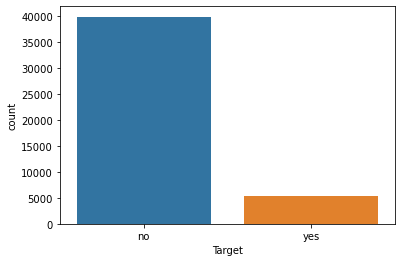

In [ ]:
# Univariate Anlysis
print(cust_data['Target'].value_counts(normalize=True))
sns.countplot(cust_data['Target'])

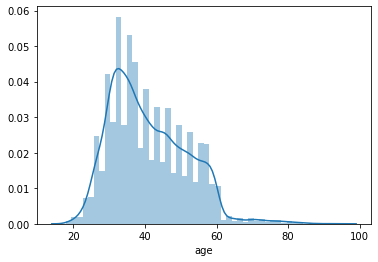

In [ ]:
#just 11 percent of the people (from the given dataset) have taken term deposit 
#Age distibution
sns.distplot(cust_data['age'])

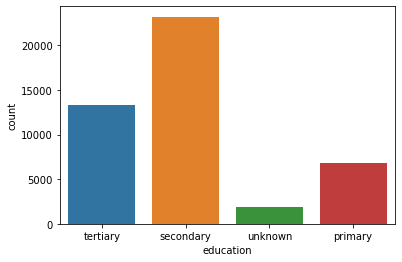

In [ ]:

#Age varies between 18 to 95 but it is positively skewed not a normal distribution
#Education 
sns.countplot(cust_data['education'])
#majority of people have secondary Education
#there are few unknows

448.0

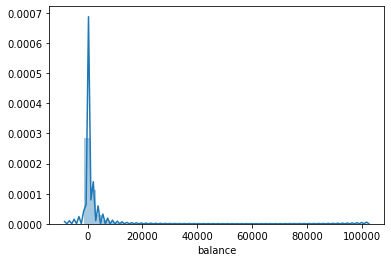

In [ ]:
#bank balance
sns.distplot(cust_data['balance'])
cust_data['balance'].median()
#mean is away from median heavily skewed positively

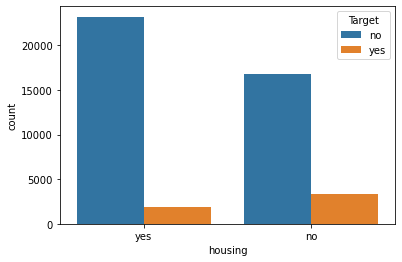

In [ ]:
#Multivariate analysis
sns.countplot(cust_data['housing'],hue=cust_data['Target'])

In [ ]:
#people without housing loan are having deposits
 

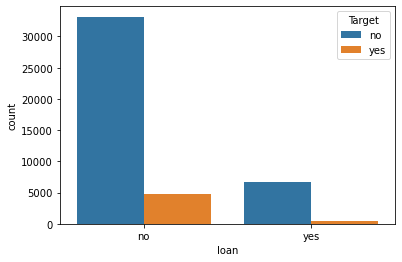

In [ ]:
sns.countplot(cust_data['loan'],hue=cust_data['Target'])
#people without personal loan have bought term deposits

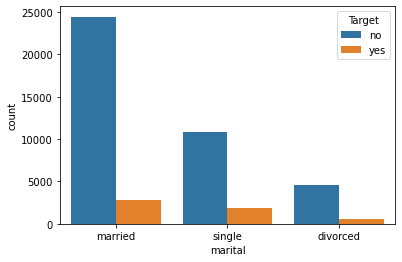

In [ ]:
sns.countplot(cust_data['marital'], hue=cust_data['Target'])
#married people have more term deposits

[Text(0, 0, 'management'),
 Text(0, 0, 'technician'),
 Text(0, 0, 'entrepreneur'),
 Text(0, 0, 'blue-collar'),
 Text(0, 0, 'unknown'),
 Text(0, 0, 'retired'),
 Text(0, 0, 'admin.'),
 Text(0, 0, 'services'),
 Text(0, 0, 'self-employed'),
 Text(0, 0, 'unemployed'),
 Text(0, 0, 'housemaid'),
 Text(0, 0, 'student')]

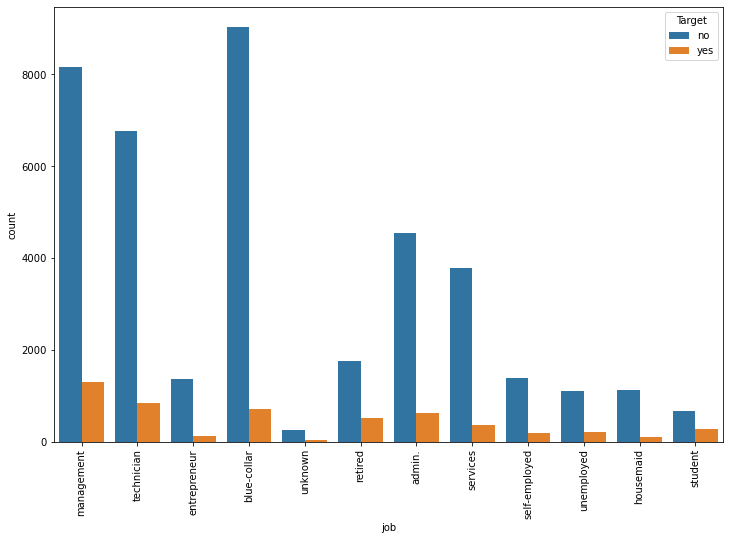

In [ ]:
plot.figure(figsize=(12,8))

jobPlot =sns.countplot(cust_data['job'], hue=cust_data['Target'])
jobPlot.set_xticklabels(jobPlot.get_xticklabels(), rotation=90)
#Management staff  have bought more term deposits 

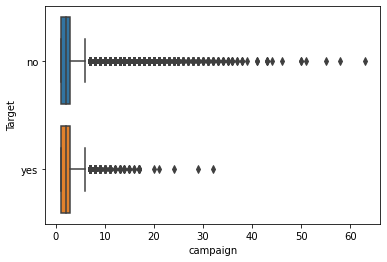

In [ ]:
sns.boxplot(cust_data['campaign'], cust_data['Target'])

In [ ]:
#Number of contacts performed during the campaign doesnt make any difference/effect is selling the term deposits. lot of outliers too
# 2 calls is the average but max is 63 calls 

36954

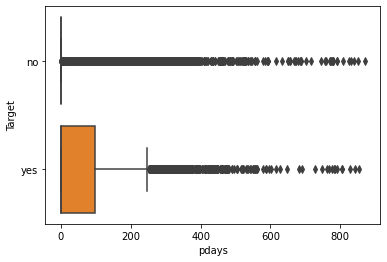

In [ ]:
sns.boxplot(cust_data['pdays'], cust_data['Target'])
cust_data.pdays[cust_data['pdays'] == -1].count()
#There are many customers  (36954) who have not  been contacted  beyond 900 days.
# mean and median are -1 . hence there are many outliers

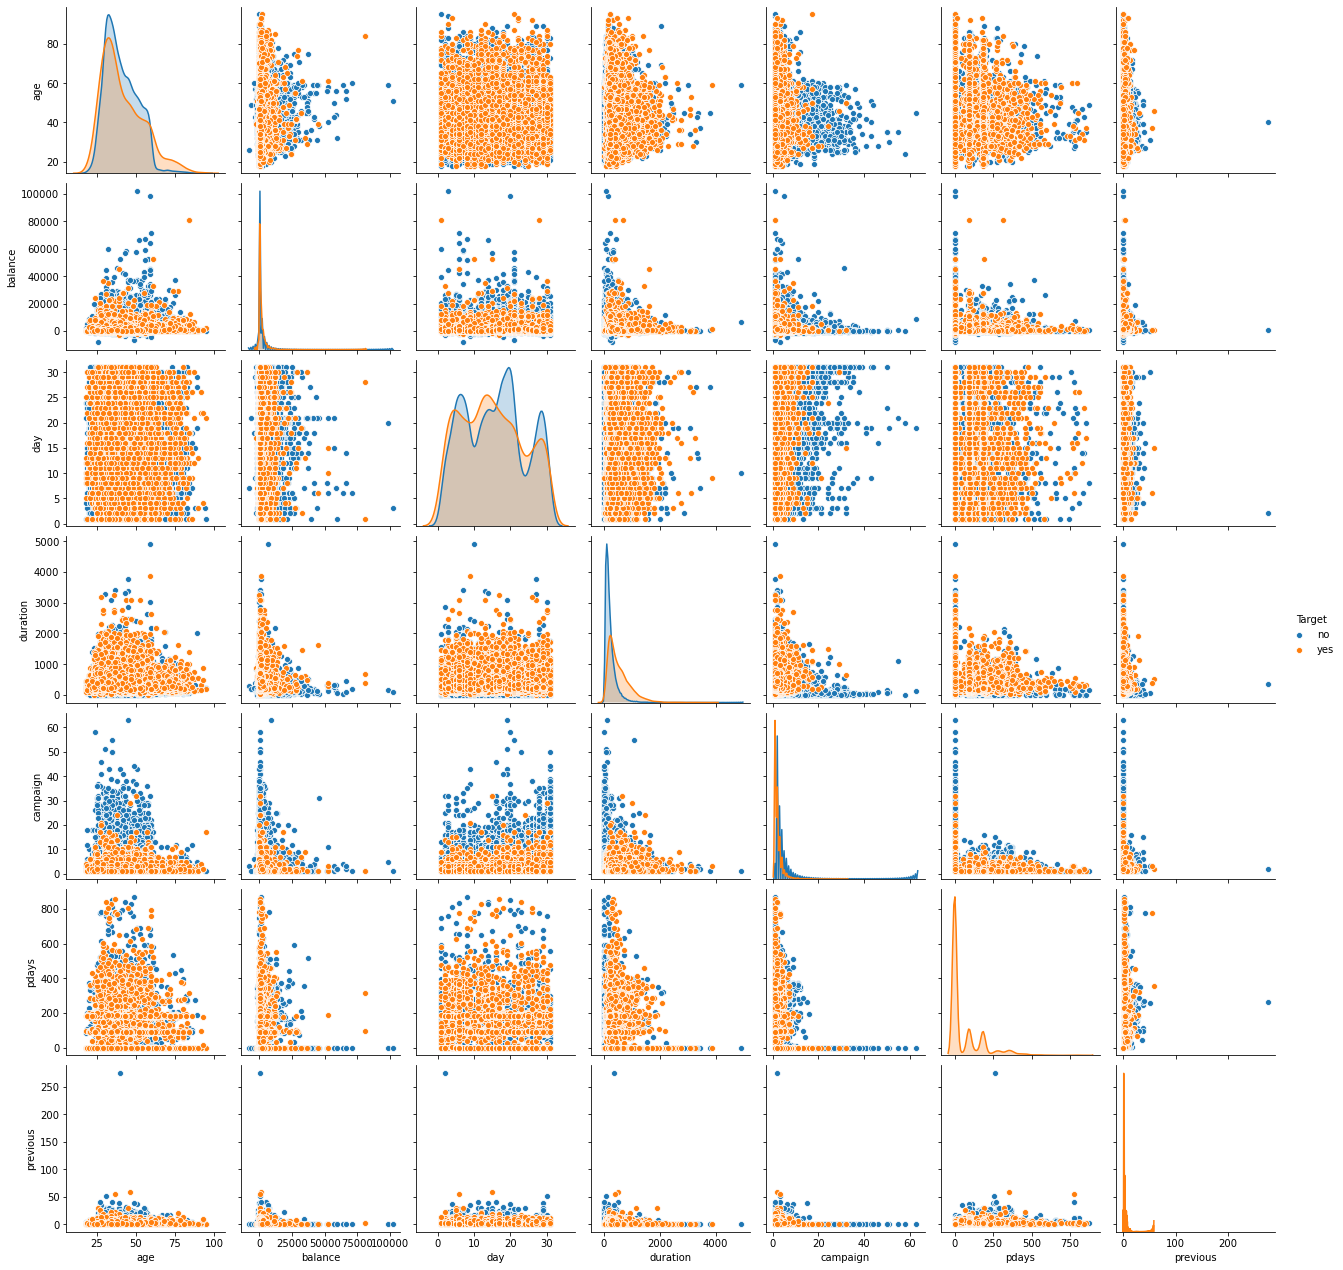

In [ ]:
sns.pairplot(cust_data, hue='Target')

In [ ]:
# Cleaning data
# Convert all categorical datatype from object to category
for feature in cust_data.columns:
    if cust_data[feature].dtype == 'object':
        cust_data[feature] = pd.Categorical(cust_data[feature])

In [ ]:
cust_data.dtypes

age             int64
job          category
marital      category
education    category
default      category
balance         int64
housing      category
loan         category
contact      category
day             int64
month        category
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome     category
Target       category
dtype: object

In [ ]:
# Check different categories in each column
print(cust_data['job'].value_counts())
print(cust_data['marital'].value_counts())
print(cust_data['education'].value_counts())
print(cust_data['default'].value_counts())
print(cust_data['housing'].value_counts())
print(cust_data['loan'].value_counts())
print(cust_data['contact'].value_counts())
print(cust_data['month'].value_counts())
print(cust_data['poutcome'].value_counts())
print(cust_data['Target'].value_counts())


blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64
no     44396
yes      815
Name: default, dtype: int64
yes    25130
no     20081
Name: housing, dtype: int64
no     37967
yes     7244
Name: loan, dtype: int64
cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64
unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64
n

In [ ]:
#replace yes or no  values  with numeric values
replaceDict = {'Target' : {'no':0,'yes':1},
              'loan' : {'no':0,'yes':1},
              'housing':{'no':0,'yes':1},
              'default':{'no':0 ,'yes':1}}
cust_data = cust_data.replace(replaceDict)


In [ ]:
print(cust_data['job'].mode()[0])
cust_data.head()

blue-collar


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0


In [ ]:
EDA Analysis Summary:
    
    1. There is no correlation between features.
    2. Amoung the given dataset around 11% of the people have bought the deposit.
    3. People with management job have bought more.
    4. Married people have more deposits than single. 
    5. people with personal loan and housing loan have less term deposits.
    6. Age, bank balance are positively skewed. 
    7.  Amoung the other attributes
         'pdays' (mostly negative hence not contacted)
         'previous' (number of cotacts made before )
         'poutcome' ( outcome of last campaign is unknown for many clients )
         Doesnt seem to add any value to target variable, hence dropped.
    

In [ ]:
#Deliverable 2
#prepare the data for anlytics
#replace unknown value in 'job' and 'education' feature to majority value
#'contact' and 'poutcome' features have majority unknown. hence dont replace
job_unknown_idx = cust_data.job[cust_data['job'] =='unknown'].index
cust_data.loc[job_unknown_idx, 'job'] = cust_data['job'].mode()[0]

education_unknown_idx = cust_data.education[cust_data['education'] =='unknown'].index
cust_data.loc[education_unknown_idx,'education'] = cust_data['education'].mode()[0]

In [ ]:
cust_data.job[cust_data['job'] =='unknown'].count()
cust_data.job[cust_data['education'] =='unknown'].count()

0

In [ ]:
#generate dummy values for category column
onehotcolumns =['contact','marital','education','job']
cust_data = pd.get_dummies(cust_data,columns=onehotcolumns)

In [ ]:
cust_data.head(5)

,age,default,balance,housing,loan,month,duration,campaign,Target,contact_cellular,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,58,no,2143,yes,no,may,261,1,no,0,...,0,0,1,0,0,0,0,0,0,0
1,44,no,29,yes,no,may,151,1,no,0,...,0,0,0,0,0,0,0,1,0,0
2,33,no,2,yes,yes,may,76,1,no,0,...,1,0,0,0,0,0,0,0,0,0
3,47,no,1506,yes,no,may,92,1,no,0,...,0,0,0,0,0,0,0,0,0,0
4,33,no,1,no,no,may,198,1,no,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#drop feature of no value
cust_data = cust_data.drop(columns=['pdays','previous','poutcome','day'])

In [ ]:
#independent variables
x= cust_data.loc[:, cust_data.columns != 'Target']
#target variable
y= cust_data.loc[:, cust_data.columns == 'Target']

In [ ]:
x.head()
x.dtypes
month_dict={'month':{'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12}}
x = x.replace(month_dict)




In [ ]:
#split the data into training and test 
x_train,x_test,y_train, y_test = train_test_split(x, y, test_size=.30, random_state=7)
x_train.head()



,age,default,balance,housing,loan,month,duration,campaign,contact_cellular,contact_telephone,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
35272,39,0,4239,1,0,5,40,1,1,0,...,0,0,1,0,0,0,0,0,0,0
10705,44,0,647,0,0,6,226,2,0,0,...,0,0,1,0,0,0,0,0,0,0
43536,46,0,429,1,0,4,465,2,1,0,...,0,0,0,0,0,0,0,0,0,0
6960,55,0,81,1,0,5,172,1,0,0,...,0,0,0,0,0,0,0,0,0,0
41892,28,0,172,1,0,10,123,2,1,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#build linear regression model
from sklearn.linear_model import LogisticRegression
model= LogisticRegression(random_state=7)
model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=7, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_predict = model.predict(x_test)
print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

0.8873510917306537
0.8928044824535535


In [ ]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score
## function to get confusion matrix in a proper format
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plot.ylabel('Observed')
    plot.xlabel('Predicted')
    plot.show()

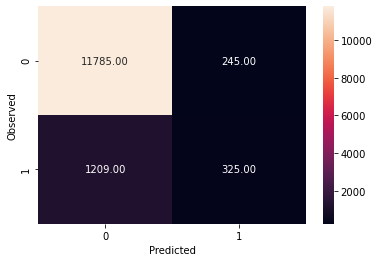

In [ ]:
draw_cm(y_test,y_predict)

In [ ]:
print(recall_score(y_test,y_predict))
print(precision_score(y_test, y_predict))
#accuracy is not bad but recall score is very bad, False negative is very high


0.211864406779661
0.5701754385964912


In [ ]:
#check parameters and improve model
model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 7,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [ ]:
train_score=[]
test_score=[]
solver = ['newton-cg','lbfgs','liblinear','sag','saga']
for i in solver:
    model = LogisticRegression(random_state=7,penalty='l2', solver=i)  # changing values of solver
    model.fit(x_train, y_train) 
    y_predict = model.predict(x_test)     
    train_score.append(round(model.score(x_train,y_train),3))
    test_score.append(round(model.score(x_test, y_test),3))
    
print(solver)
print()
print(train_score)
print()
print(test_score)

['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

[0.888, 0.887, 0.888, 0.881, 0.881]

[0.896, 0.893, 0.895, 0.887, 0.886]


In [ ]:
train_score=[]
test_score=[]
solver = ['liblinear','saga']  # changing values of solver which works with 'l1'
for i in solver:
    model = LogisticRegression(random_state=7,penalty='l1', solver=i)  # changed value of penaly to 'l1'
    model.fit(x_train, y_train) 
    y_predict = model.predict(x_test)     
    train_score.append(round(model.score(x_train,y_train),3))
    test_score.append(round(model.score(x_test, y_test),3))
    
print(solver)
print()
print(train_score)
print()
print(test_score)

['liblinear', 'saga']

[0.888, 0.881]

[0.896, 0.886]


In [ ]:
# Running a loop to check different values of 'C'

train_score=[]                                 
test_score=[]
C = [0.01,0.1,0.25,0.5,0.75,1]
for i in C:
    model = LogisticRegression(random_state=7,penalty='l1',solver='liblinear', C=i)  # changing values of C
    model.fit(x_train, y_train) 
    y_predict = model.predict(x_test)     
    train_score.append(round(model.score(x_train,y_train),3)) # appending training accuracy in a blank list for every run of the loop
    test_score.append(round(model.score(x_test, y_test),3))   # appending testing accuracy in a blank list for every run of the loop
    
print(C)
print()
print(train_score)
print()
print(test_score)

[0.01, 0.1, 0.25, 0.5, 0.75, 1]

[0.888, 0.888, 0.888, 0.888, 0.888, 0.888]

[0.895, 0.896, 0.896, 0.896, 0.896, 0.896]


In [ ]:
#there is no difference  in changing the parameters.Use the parameters which gives better result and build the model
linearModel = LogisticRegression(random_state=7,penalty='l1',solver='liblinear', C=0.1)
linearModel.fit(x_train,y_train)
y_predict = linearModel.predict(x_test)
print("Training accuracy:", linearModel.score(x_train, y_train))
LM_AC = linearModel.score(x_test, y_test)
print("Testing accuracy" , linearModel.score(x_test, y_test)) 
print("recall score:" ,recall_score(y_test,y_predict))
LM_recall = recall_score(y_test,y_predict)
print("precision score:",precision_score(y_test, y_predict)) 
LM_PREC = precision_score(y_test, y_predict)
print("F1-score:",f1_score(y_test, y_predict))
LM_F1 = f1_score(y_test, y_predict)
LM_ROC =   roc_auc_score(y_test,y_predict)
print("ROC_AUC_score:", roc_auc_score(y_test,y_predict))

Training accuracy: 0.8880146617372895
Testing accuracy 0.8958271896195813
recall score: 0.22685788787483702
precision score: 0.6052173913043478
F1-score: 0.33001422475106684
ROC_AUC_score: 0.6039941974702531


In [ ]:
from sklearn.tree import DecisionTreeClassifier
treeModel = DecisionTreeClassifier(criterion='entropy')

In [ ]:
treeModel.fit(x_train, y_train)
y_predict = treeModel.predict(x_test)
print("Training accuracy:", treeModel.score(x_train, y_train))
print("Testing accuracy:" , treeModel.score(x_test, y_test))      

Training accuracy: 1.0
Testing accuracy: 0.8662636390445296


In [ ]:
#lets prune the tree and see
prunedTree = DecisionTreeClassifier(criterion='entropy', max_depth=3,random_state=7)
prunedTree.fit(x_train, y_train)
y_predict = prunedTree.predict(x_test)
print(prunedTree.score(x_train, y_train))
print(prunedTree.score(x_test,y_test))
print("recall score:" , recall_score(y_test,y_predict))
print("precision score:" ,precision_score(y_test, y_predict))  
print("F1-score:",f1_score(y_test, y_predict))
print("ROC_AUC_score:", roc_auc_score(y_test,y_predict))
TM_AC=prunedTree.score(x_test,y_test)
TM_recall = recall_score(y_test, y_predict)
TM_PREC = precision_score(y_test, y_predict)
TM_F1 = f1_score(y_test, y_predict)
TM_ROC = roc_auc_score(y_test,y_predict)

0.8871615003001865
0.8947213211442052
recall score: 0.2105606258148631
precision score: 0.5981481481481481
F1-score: 0.3114754098360656
ROC_AUC_score: 0.5962611940379386


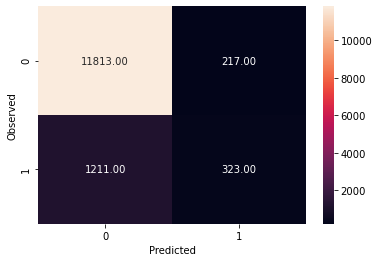

In [ ]:
draw_cm(y_test,y_predict)
#False negative is high same as regression model. 

In [ ]:
# Use random forest algorithm and check the accuracy  
# use the same parameters to compare differnt model 
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(criterion = 'entropy', random_state=7)  
rf = rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
print("training accuracy:", rf.score(x_train, y_train))
print("test accuracy:" ,rf.score(x_test , y_test))
print("recall score:" , recall_score(y_test,y_pred))
print("precision score:" ,precision_score(y_test, y_pred))  
print("F1-score:",f1_score(y_test, y_pred))
print("ROC_AUC_score:", roc_auc_score(y_test,y_pred))
RF_AC=rf.score(x_test,y_test)
RF_recall = recall_score(y_test, y_predict)
RF_PREC = precision_score(y_test, y_predict)
RF_F1 = f1_score(y_test, y_predict)
RF_ROC = roc_auc_score(y_test,y_predict)

training accuracy: 1.0
test accuracy: 0.8960483633146564
recall score: 0.2907431551499348
precision score: 0.5807291666666666
F1-score: 0.38748913987836664
ROC_AUC_score: 0.6319883689299134


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
boostModel =AdaBoostClassifier(n_estimators= 20,random_state=7)
boostModel = boostModel.fit(x_train, y_train)

y_predict = boostModel.predict(x_test)
print("training accuracy:",boostModel.score(x_train, y_train))
print("test accuracy:" ,boostModel.score(x_test , y_test))
print("recall score:" , recall_score(y_test,y_predict))
print("precision score:" ,precision_score(y_test, y_predict))  
print("F1-score:",f1_score(y_test, y_predict))
print("ROC_AUC_score:", roc_auc_score(y_test,y_predict))
BM_AC=boostModel.score(x_test,y_test)
BM_recall = recall_score(y_test, y_predict)
BM_PREC = precision_score(y_test, y_predict)
BM_F1 = f1_score(y_test, y_predict)
BM_ROC = roc_auc_score(y_test,y_predict)


training accuracy: 0.8854235788542358
test accuracy: 0.8914037157180773
recall score: 0.29791395045632335
precision score: 0.5357561547479485
F1-score: 0.38290741516547966
ROC_AUC_score: 0.6324981223603312


In [ ]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(n_estimators=20, bootstrap=True ,random_state=7)
bgcl = bgcl.fit(x_train, y_train)
y_predict = bgcl.predict(x_test)
print("training accuracy:",bgcl.score(x_train, y_train))
print("test accuracy:" ,bgcl.score(x_test , y_test))
print("recall score:" , recall_score(y_test,y_predict))
print("precision score:" ,precision_score(y_test, y_predict))  
print("F1-score:",f1_score(y_test, y_predict))
print("ROC_AUC_score:", roc_auc_score(y_test,y_predict))
BGC_AC = bgcl.score(x_test,y_test)
BGC_recall = recall_score(y_test, y_predict)
BGC_PREC = precision_score(y_test, y_predict)
BGC_F1 = f1_score(y_test, y_predict)
BGC_ROC = roc_auc_score(y_test,y_predict)

training accuracy: 0.9971877271147345
test accuracy: 0.8939840754939545
recall score: 0.3644067796610169
precision score: 0.5469667318982387
F1-score: 0.4374021909233177
ROC_AUC_score: 0.6629598320582724


training accuracy: 0.9017600404461719
test accuracy: 0.8993659687407844
recall score: 0.394393741851369
precision score: 0.5811719500480308
F1-score: 0.4699029126213593
ROC_AUC_score: 0.6790755076671642


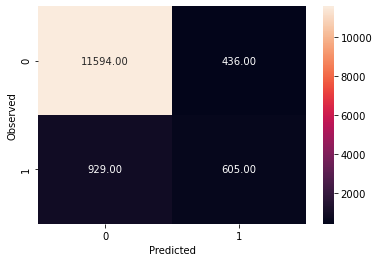

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 20,learning_rate =0.9,  random_state=7)
gbcl = gbcl.fit(x_train, y_train)
y_predict = gbcl.predict(x_test)
print("training accuracy:",gbcl.score(x_train, y_train))
print("test accuracy:" ,gbcl.score(x_test , y_test))
print("recall score:" , recall_score(y_test,y_predict))
print("precision score:" ,precision_score(y_test, y_predict))  
print("F1-score:",f1_score(y_test, y_predict))
print("ROC_AUC_score:", roc_auc_score(y_test,y_predict))

GBC_AC=gbcl.score(x_test,y_test)
GBC_recall = recall_score(y_test, y_predict)
GBC_PREC = precision_score(y_test, y_predict)
GBC_F1 = f1_score(y_test, y_predict)
GBC_ROC = roc_auc_score(y_test,y_predict)
draw_cm(y_test,y_predict)
# better results here 

In [ ]:
#compare the results using dataframe
data = [{'Method' : 'Logistic Regression', 'test_accuracy': LM_AC,'recall':LM_recall,'precision': LM_PREC, 'F1_score':LM_F1,'ROC_AUC':LM_ROC },
        {'Method' : 'Decision Tree(pruned)', 'test_accuracy': TM_AC,'recall':TM_recall,'precision': TM_PREC, 'F1_score':TM_F1,'ROC_AUC':TM_ROC },
        {'Method' : 'Random Forest', 'test_accuracy': RF_AC,'recall':RF_recall,'precision': RF_PREC, 'F1_score':RF_F1,'ROC_AUC':RF_ROC },
        {'Method' : 'Ada Booster', 'test_accuracy': BM_AC,'recall':BM_recall,'precision': BM_PREC, 'F1_score':BM_F1,'ROC_AUC':BM_ROC },
        {'Method' : 'Bagging classifier', 'test_accuracy': BGC_AC,'recall':BGC_recall,'precision': BGC_PREC, 'F1_score':BGC_F1,'ROC_AUC':BGC_ROC },
        {'Method' : 'Gradient Booster', 'test_accuracy': GBC_AC,'recall':GBC_recall,'precision': GBC_PREC, 'F1_score':GBC_F1,'ROC_AUC':GBC_ROC }
       ]
results_df = pd.DataFrame(data)
results_df.head(6)
# out of all, 'Gradient booster' method has given better results especially recall value (meaning False negatives are less) 
# Thats because this model has  hyperparameter 'learning_rate'. Each leaf is mutiplied by this parameter and more trees are grown. 
#This reduces the variance and gives better results 

,Method,test_accuracy,recall,precision,F1_score,ROC_AUC
0,Logistic Regression,0.895827,0.226858,0.605217,0.330014,0.603994
1,Decision Tree(pruned),0.894721,0.210561,0.598148,0.311475,0.596261
2,Random Forest,0.896048,0.210561,0.598148,0.311475,0.596261
3,Ada Booster,0.891404,0.297914,0.535756,0.382907,0.632498
4,Bagging classifier,0.893984,0.364407,0.546967,0.437402,0.662960
5,Gradient Booster,0.899366,0.394394,0.581172,0.469903,0.679076
